In [1]:
import pandas as pd

In [2]:
file_1 = '/Users/gta/Desktop/nyc-school/2016 School Explorer.csv'
file_2 = '/Users/gta/Desktop/nyc-school/D5 SHSAT Registrations and Testers.csv'

In [3]:
df_1 = pd.read_csv(file_1)
df_2 = pd.read_csv(file_2)

In [4]:
pd.set_option('display.max_columns', None) 

In [95]:
df_1.head(3)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [94]:
df_1['School Name'].unique().tolist()

['P.S. 015 ROBERTO CLEMENTE',
 'P.S. 019 ASHER LEVY',
 'P.S. 020 ANNA SILVER',
 'P.S. 034 FRANKLIN D. ROOSEVELT',
 'THE STAR ACADEMY - P.S.63',
 'P.S. 064 ROBERT SIMON',
 'P.S. 110 FLORENCE NIGHTINGALE',
 'P.S. 134 HENRIETTA SZOLD',
 'P.S. 140 NATHAN STRAUS',
 'P.S. 142 AMALIA CASTRO',
 'P.S. 184M SHUANG WEN',
 'P.S. 188 THE ISLAND SCHOOL',
 'ORCHARD COLLEGIATE ACADEMY',
 'TECHNOLOGY, ARTS, AND SCIENCES STUDIO',
 'THE EAST VILLAGE COMMUNITY SCHOOL',
 'UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL',
 "THE CHILDREN'S WORKSHOP SCHOOL",
 'NEIGHBORHOOD SCHOOL',
 'EARTH SCHOOL',
 'SCHOOL FOR GLOBAL LEADERS',
 'EAST SIDE COMMUNITY SCHOOL',
 'NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL',
 'TOMPKINS SQUARE MIDDLE SCHOOL',
 'P.S. 001 ALFRED E. SMITH',
 'P.S. 002 MEYER LONDON',
 'P.S. 003 CHARRETTE SCHOOL',
 'P.S. 006 LILLIE D. BLAKE',
 'P.S. 011 WILLIAM T. HARRIS',
 'P.S. 033 CHELSEA PREP',
 'P.S. 040 AUGUSTUS SAINT-GAUDENS',
 'P.S. 041 GREENWICH VILLAGE',
 'P.S. 042 BENJAMIN ALTMAN',

In [92]:
df_2['School name'].unique()

array(['P.S. 046 Arthur Tappan', 'P.S. 123 Mahalia Jackson',
       'P.S. 129 John H. Finley', 'Eagle Academy for Young Men of Harlem',
       'The Urban Assembly School for Global Commerce',
       'P.S. 161 Pedro Albizu Campos',
       'I.S. M286 Renaissance Leadership Academy',
       'Urban Assembly Academy for Future Leaders', 'KAPPA IV',
       'Mott Hall High School', 'Columbia Secondary School',
       'Academy for Social Action: A College Board School',
       'Academy for Social Action',
       'Urban Assembly School for the Performing Arts',
       'The Urban Assembly Institute for New Technologies',
       'Choir Academy of Harlem', 'Frederick Douglass Academy',
       'New Design Middle School',
       'Thurgood Marshall Academy for Learning and Social Change',
       'High School for Mathematics, Science and Engineering at City College',
       'Democracy Prep Endurance Charter School',
       "Harlem Children's Zone Promise Academy 1 Charter School",
       'KIPP Infinit

In [6]:
#Strip out percent signs from columns.

def remove_percent(d):
    return float(d.strip('%'))/100

In [7]:
df_1[['Percent ELL',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic',
    'Percent Black / Hispanic',
    'Percent White',
    'Percent of Students Chronically Absent',
    'Rigorous Instruction %',
    'Collaborative Teachers %',
    'Supportive Environment %',
    'Effective School Leadership %',
    'Strong Family-Community Ties %',
    'Trust %', 
    'Student Attendance Rate']] = df_1[['Percent ELL',
                    'Percent Asian',
                    'Percent Black',
                    'Percent Hispanic',
                    'Percent Black / Hispanic',
                    'Percent White',
                    'Percent of Students Chronically Absent',
                    'Rigorous Instruction %',
                    'Collaborative Teachers %',
                    'Supportive Environment %',
                    'Effective School Leadership %',
                    'Strong Family-Community Ties %',
                    'Trust %',
                    'Student Attendance Rate']].astype(str).applymap(remove_percent)

In [8]:
df_1['School Income Estimate'] = df_1['School Income Estimate'].replace('[\$,)]','', regex=True ).astype(float)

In [9]:
df_1.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

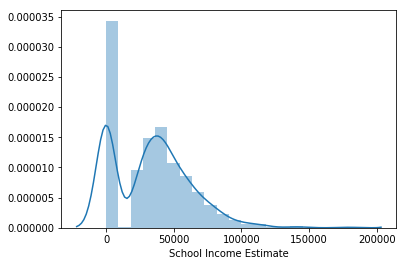

In [11]:
x = df_1['School Income Estimate'].fillna(np.mean(a=0))
sns.distplot(x, bins=20)

In [12]:
unique_cities = df_1['City'].unique().tolist()

In [55]:
df_1.groupby(['City'])['School Income Estimate'].mean()

City
ARVERNE                44016.675000
ASTORIA                57263.502000
BAYSIDE                73019.988000
BELLEROSE              77483.010000
BROAD CHANNEL          67021.510000
BRONX                  32417.241852
BROOKLYN               44997.825845
CAMBRIA HEIGHTS        79015.435000
COLLEGE POINT          58435.355000
CORONA                 44648.348750
DOUGLASTON             89380.410000
EAST ELMHURST          54356.810000
ELMHURST               49648.368000
FAR ROCKAWAY           38678.007143
FLORAL PARK            80255.080000
FLUSHING               54059.617143
FOREST HILLS           73165.788000
GLENDALE               56825.462000
HOLLIS                 62457.413333
HOWARD BEACH           72111.203333
JACKSON HEIGHTS        49835.313333
JAMAICA                54681.117619
KEW GARDENS            63599.760000
LITTLE NECK            82958.965000
LONG ISLAND CITY       50849.652308
MASPETH                56091.945000
MIDDLE VILLAGE         67014.966667
NEW YORK               

In [16]:
#Count the number of NaN in each column.
df_num_nan = pd.DataFrame(df_1.count(), columns=['number of points'])

#Shows columns that have missing data. 
df_num_nan[df_num_nan['number of points'] < 1272]

,number of points
Adjusted Grade,2
New?,27
Other Location Code in LCGMS,1
Economic Need Index,1247
School Income Estimate,876
Student Attendance Rate,1247
Percent of Students Chronically Absent,1247
Rigorous Instruction %,1247
Rigorous Instruction Rating,1196
Collaborative Teachers %,1247


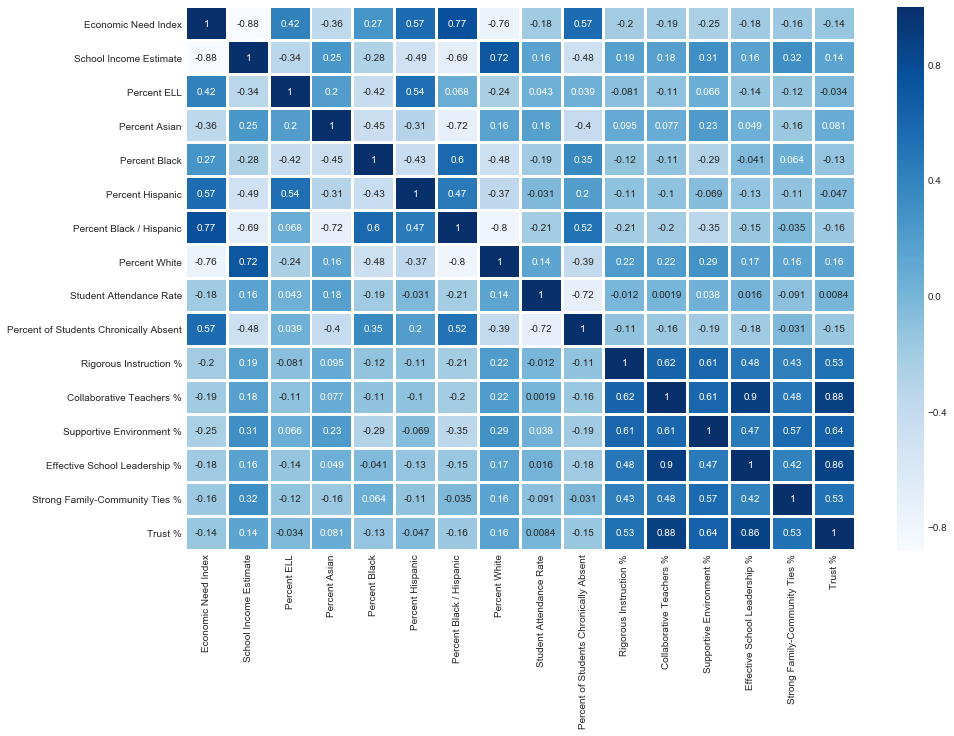

In [180]:
df_corr = df_1.iloc[:,[16,17,18,19,20,21,22,23,24,25,26,28,30,32,34,36]]
corr = df_corr.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Blues",
            linewidths=2,
            annot=True)

In [126]:
df_eco_need = df_1[['Economic Need Index', 
                    'City']].groupby('City', as_index=False).mean().sort_values(by='Economic Need Index',
                                                                ascending=False).reset_index()

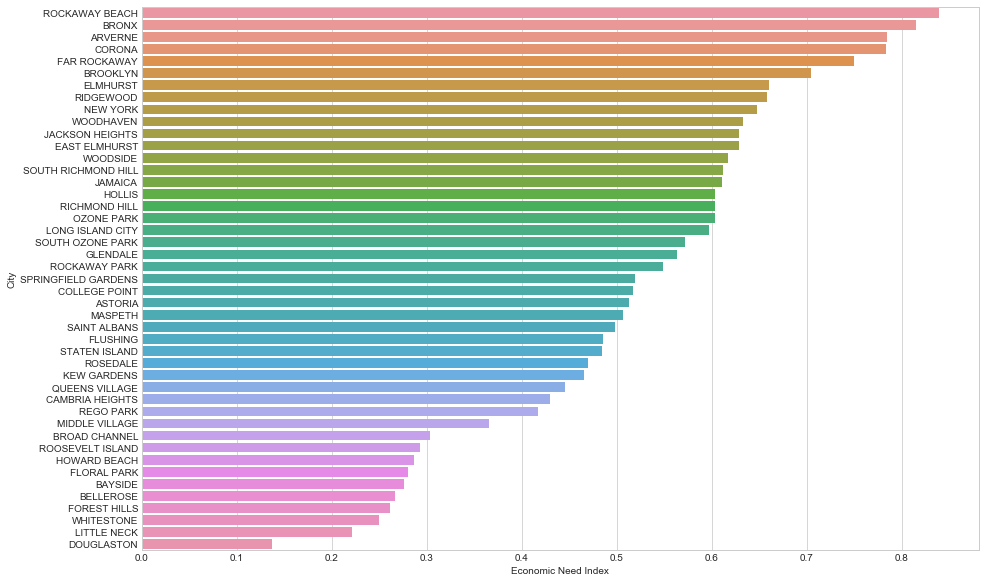

In [181]:
plt.subplots(figsize=(15,10))
sns.barplot(y="City", x="Economic Need Index", data=df_eco_need)

In [144]:
df_1["Economic Need Index"] = df_1["Economic Need Index"].fillna(df_1["Economic Need Index"].mean())

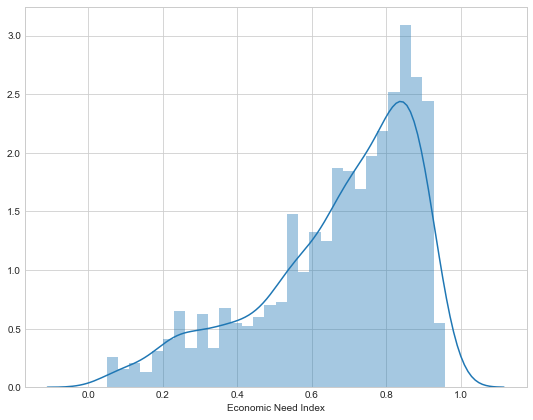

In [151]:
plt.subplots(figsize=(9,7))
sns.distplot(df_1["Economic Need Index"], bins=30)

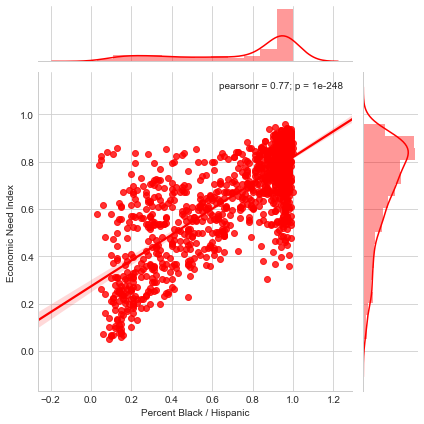

In [154]:
sns.jointplot("Percent Black / Hispanic", "Economic Need Index", df_1,kind='reg',color="red") 

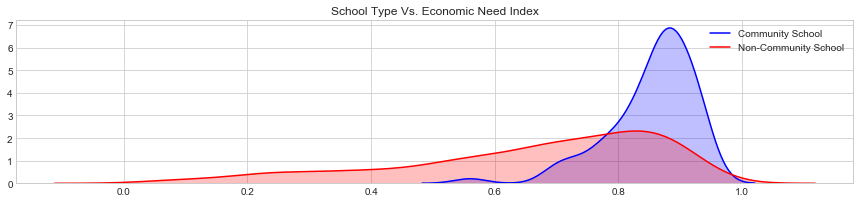

In [164]:
fig = plt.figure(figsize=(15,3))

ax=sns.kdeplot(df_1.loc[(df_1['Community School?'] == 'Yes'),
                        'Economic Need Index'],
               color='b', 
               shade=True, 
               label='Community School')

ax=sns.kdeplot(df_1.loc[(df_1['Community School?'] == 'No'),
                        'Economic Need Index'], 
               color='r', 
               shade=True, 
               label='Non-Community School')

plt.title('School Type Vs. Economic Need Index')
plt.show()

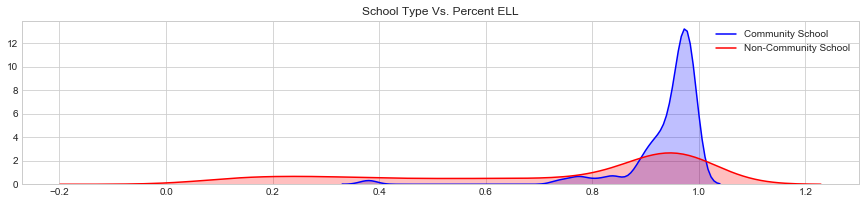

In [182]:
fig = plt.figure(figsize=(15,3))

ax=sns.kdeplot(df_1.loc[(df_1['Community School?'] == 'Yes'),
                        'Percent Black / Hispanic'],
               color='b', 
               shade=True, 
               label='Community School')

ax=sns.kdeplot(df_1.loc[(df_1['Community School?'] == 'No'),
                        'Percent Black / Hispanic'], 
               color='r', 
               shade=True, 
               label='Non-Community School')

plt.title('School Type Vs. Percent ELL')
plt.show()